## Shark attacks

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap 

In [4]:
sharks = pd.read_excel("GSAF5.xls")

In [5]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.07.09,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,...,"Bull shark, 4' to 5'","Miami-Beach Patch, 7/9/2017",2017.07.09-Lanza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.09,2017.07.09,6105.0,NaN,NaN
1,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,...,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.07,2017.07.07,6104.0,NaN,NaN
2,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,...,NaN,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6103.0,NaN,NaN
3,2017.06.29,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,...,NaN,"C. Creswell, GSAF",2017.06.29-Wrightsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29,2017.06.29,6102.0,NaN,NaN
4,2017.06.29.R,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,...,NaN,"TriStateHomePage, 6/29/2017",2017.06.29.R-Wallhauser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29.R,2017.06.29.R,6101.0,NaN,NaN
5,2017.06.19,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,...,NaN,"CBS12, 6/19/2017",2017.06.19-SingerIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.19,2017.06.19,6100.0,NaN,NaN
6,2017.06.18.b,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,...,"Bull shark, 4' to 5'","NBC, 6/29/2017",2017.06.18.b-Readnour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.b,2017.06.18.b,6099.0,NaN,NaN
7,2017.06.18.a,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,...,"Bull shark, 2m","Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6098.0,NaN,NaN
8,2017.06.17,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,...,NaN,"Diario de Ibiza, 6/17/'2017",2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.17,2017.06.17,6097.0,NaN,NaN
9,2017.06.14.R,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,...,NaN,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6096.0,NaN,NaN


In [12]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [16]:
sharks["Sex "].value_counts().head()

M      4911
F       610
M         2
lli       1
.         1
Name: Sex , dtype: int64

In [6]:
sharks["Sex "].value_counts(dropna=False)

NaN    20091
M       4911
F        610
M          2
N          1
lli        1
.          1
Name: Sex , dtype: int64

In [20]:
sharks["Sex "].dropna()

0       M
1       F
3       M
4       F
5       M
6       F
7       M
8       M
9       F
10      M
11      F
12      M
13      M
14      M
15      F
16      F
17      M
18      M
19      M
20      M
21      M
22      F
23      F
24      M
25      F
26      M
27      F
28      F
29      F
30      M
       ..
6072    M
6073    M
6074    M
6075    M
6076    M
6077    M
6078    M
6079    M
6081    F
6082    M
6083    M
6084    M
6085    M
6086    M
6087    M
6088    M
6090    M
6091    M
6092    M
6093    M
6094    F
6095    M
6096    M
6097    M
6098    M
6099    M
6100    M
6101    M
6102    M
6103    M
Name: Sex , Length: 5526, dtype: object

In [7]:
sharks.dropna(subset=["Sex "])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.07.09,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,...,"Bull shark, 4' to 5'","Miami-Beach Patch, 7/9/2017",2017.07.09-Lanza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.09,2017.07.09,6105.0,NaN,NaN
1,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,...,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.07,2017.07.07,6104.0,NaN,NaN
3,2017.06.29,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,...,NaN,"C. Creswell, GSAF",2017.06.29-Wrightsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29,2017.06.29,6102.0,NaN,NaN
4,2017.06.29.R,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,...,NaN,"TriStateHomePage, 6/29/2017",2017.06.29.R-Wallhauser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29.R,2017.06.29.R,6101.0,NaN,NaN
5,2017.06.19,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,...,NaN,"CBS12, 6/19/2017",2017.06.19-SingerIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.19,2017.06.19,6100.0,NaN,NaN
6,2017.06.18.b,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,...,"Bull shark, 4' to 5'","NBC, 6/29/2017",2017.06.18.b-Readnour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.b,2017.06.18.b,6099.0,NaN,NaN
7,2017.06.18.a,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,...,"Bull shark, 2m","Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6098.0,NaN,NaN
8,2017.06.17,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,...,NaN,"Diario de Ibiza, 6/17/'2017",2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.17,2017.06.17,6097.0,NaN,NaN
9,2017.06.14.R,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,...,NaN,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6096.0,NaN,NaN
10,2017.06.11,11-Jun-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0,NaN,NaN


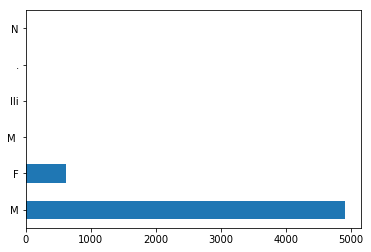

In [21]:
sharks["Sex "].value_counts().plot(kind='barh')

In [9]:
sharks["Country"].value_counts()

USA                                      2165
AUSTRALIA                                1303
SOUTH AFRICA                              572
PAPUA NEW GUINEA                          133
NEW ZEALAND                               126
BRAZIL                                    103
BAHAMAS                                   102
MEXICO                                     85
ITALY                                      71
FIJI                                       62
REUNION                                    60
PHILIPPINES                                59
NEW CALEDONIA                              51
MOZAMBIQUE                                 45
CUBA                                       42
SPAIN                                      41
INDIA                                      38
EGYPT                                      37
CROATIA                                    34
JAPAN                                      33
PANAMA                                     32
SOLOMON ISLANDS                   